In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

lung_cancer = pd.read_csv("survey lung cancer.csv")
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
print(lung_cancer.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [ ]:
le = LabelEncoder()
lung_cancer["GENDER"] = le.fit_transform(lung_cancer["GENDER"])
print(lung_cancer["GENDER"].head())

le = LabelEncoder()
lung_cancer["LUNG_CANCER"] = le.fit_transform(lung_cancer["LUNG_CANCER"])
print(lung_cancer["LUNG_CANCER"].head())

print(le.classes_)

0    1
1    1
2    0
3    1
4    0
Name: GENDER, dtype: int64
0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64
['NO' 'YES']


In [ ]:
from sklearn.ensemble import BaggingClassifier

SEED = 1
X = lung_cancer.drop(["LUNG_CANCER"], axis=1)
y = lung_cancer["LUNG_CANCER"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, criterion="entropy", random_state=SEED)
bc = BaggingClassifier(estimator=dt, oob_score=True, n_estimators=50, random_state=1)
bc.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=6,
                                                   min_samples_leaf=8,
                                                   random_state=1),
                  n_estimators=50, oob_score=True, random_state=1)

In [ ]:
y_pred = bc.predict(X_test)
acc_test = accuracy_score(y_pred, y_test)
print('Test set accuracy of bc: {:.2f}'.format(acc_test))
acc_oob = bc.oob_score_
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy of bc: 0.85
Test set accuracy: 0.855, OOB accuracy: 0.911


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

params_dt = {
    'max_depth': [4,6,8,10],
    'min_samples_leaf': [0.12,0.14,0.16,0.18],
    'min_samples_split': [2,5,10],
}
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1,
                       verbose=1)

grid_dt.fit(X_train, y_train)
best_model = grid_dt.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Test set ROC AUC score: 0.796
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.89      0.94      0.92        54

    accuracy                           0.85        62
   macro avg       0.65      0.60      0.61        62
weighted avg       0.83      0.85      0.84        62



In [ ]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1 Score: 0.918918918918919


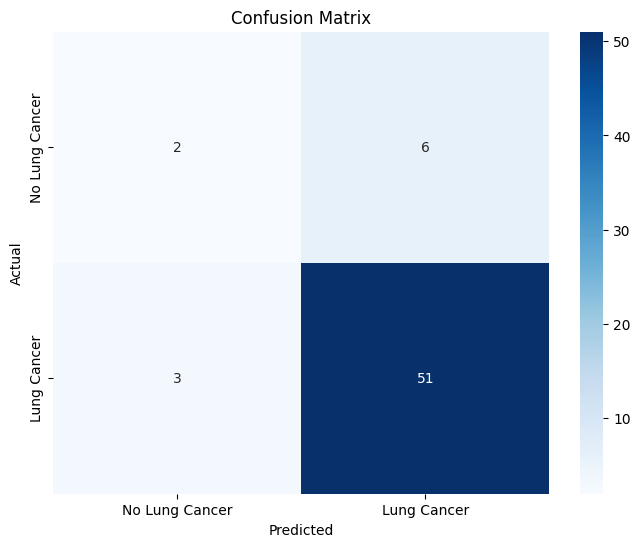

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Lung Cancer', 'Lung Cancer'],
            yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Feature Importances:
                  Feature  Importance
0                ALLERGY     0.505487
1                WHEEZING    0.349363
2          YELLOW_FINGERS    0.138506
3                     AGE    0.006644
4                 ANXIETY    0.000000
5                 SMOKING    0.000000
6                  GENDER    0.000000
7         CHRONIC DISEASE    0.000000
8           PEER_PRESSURE    0.000000
9                FATIGUE     0.000000
10      ALCOHOL CONSUMING    0.000000
11               COUGHING    0.000000
12    SHORTNESS OF BREATH    0.000000
13  SWALLOWING DIFFICULTY    0.000000
14             CHEST PAIN    0.000000


<ipython-input-108-5973606c1a83>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


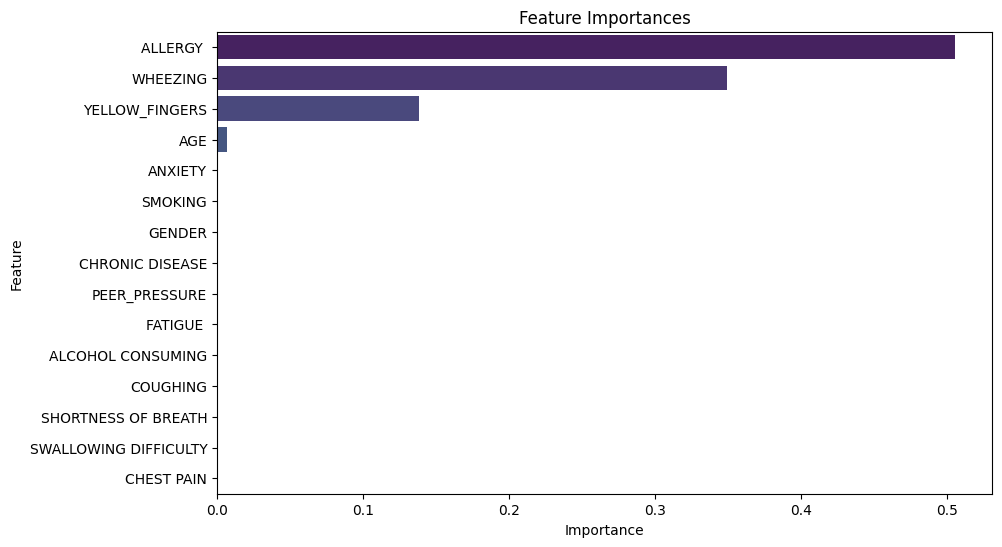

In [ ]:
feature_importances = best_model.feature_importances_

features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values('Importance', ascending=False).reset_index(drop=True)

print("\nFeature Importances:")
print(features_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


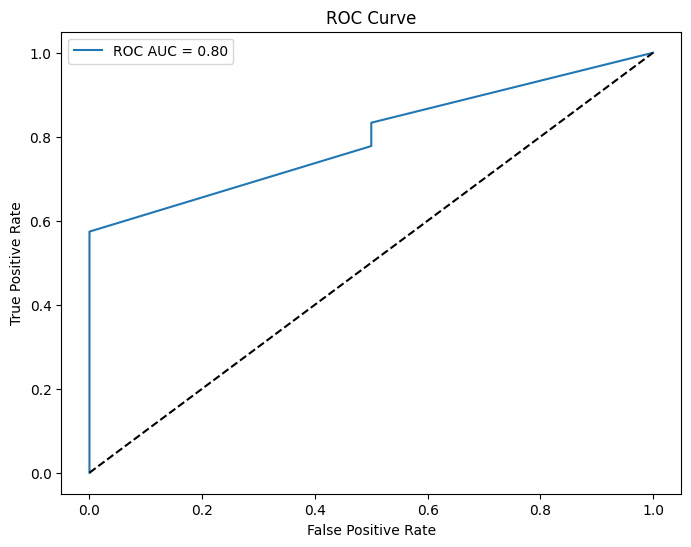

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {test_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

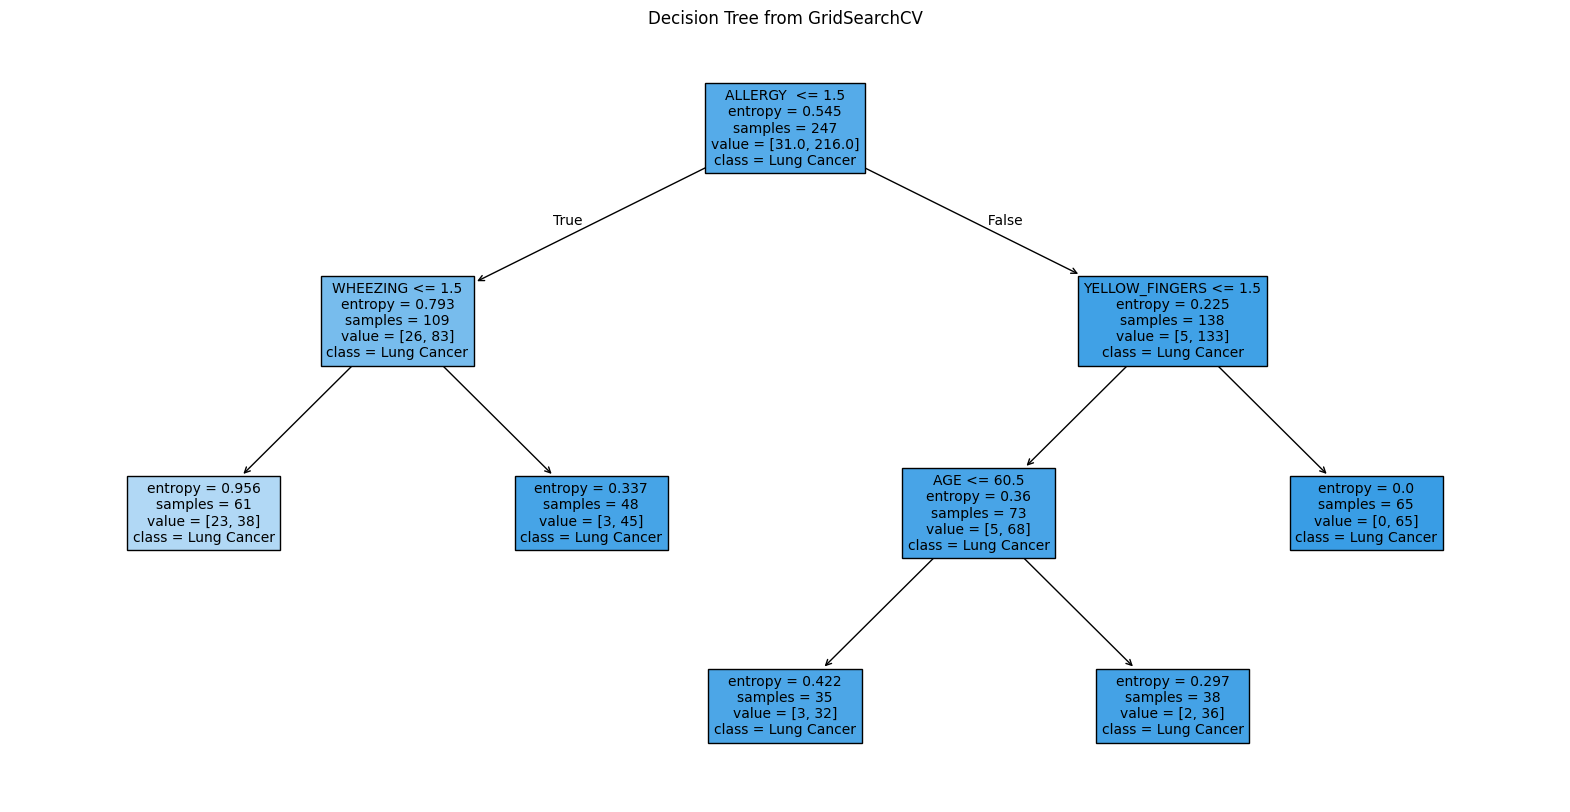

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X_train.columns, class_names=['No Lung Cancer', 'Lung Cancer'], filled=True, fontsize=10)
plt.title('Decision Tree from GridSearchCV')
plt.show()